# Baseline Model for 2x2 Jigsaw

### 1. Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from util import *
from optim import *
from layers import *
from model import *
from solver import *
%load_ext autoreload
%autoreload 2

### 2. Prepare the data (Train, Valid, Test)

In [2]:
train_path = "E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_2x2/train/"
val_path = "E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_2x2/valid/"
test_path = "E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_2x2/test/"
data = {}

Load Training Dataset

In [3]:
# Load Training Dataset
data_train = []
label_train = []

df_train = pd.read_csv(r"E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_2x2/train.csv", header = 0)
for i in range(10000): # df_train.shape[0]
    img_name = df_train['image'][i]
    img = plt.imread(train_path + img_name).reshape(1, -1)
    data_train.append(img)
    
    label = df_train['label'][i].split()
    label = [int(i) for i in label]
    label = label_generator(label)
    label_train.append(label)

data_train = np.concatenate(data_train, axis=0)
data["X_train"] = normalize(data_train, axis=1, norm='max')
data["y_train"] = np.array(label_train)

print("training data: ", data["X_train"].shape)
print("training label: ", data["y_train"].shape)

training data:  (10000, 120000)
training label:  (10000,)


In [4]:
# Load Validation Dataset
data_val = []
label_val = []
label_val_onehot = []
df_val = pd.read_csv(r"E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_2x2/valid.csv", header = 0)

for i in range(90000, 92000):
    img_name = df_train['image'][i]
    img = plt.imread(train_path + img_name).reshape(1, -1)
    data_val.append(img)
    
    label = df_train['label'][i].split()
    label = [int(i) for i in label]
    label = label_generator(label)
    label_val.append(label)

data_val = np.concatenate(data_val, axis=0)
data["X_val"] = normalize(data_val, axis=1, norm='max')
data["y_val"] = np.array(label_val)

print("validation data: ", data["X_val"].shape)
print("validation label: ", data["y_val"].shape)

validation data:  (2000, 120000)
validation label:  (2000,)


In [5]:
# Load Testing Dataset
data_test = []
label_test = []
label_test_onehot = []
df_test = pd.read_csv(r"E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_2x2/test.csv", header = 0)

for i in range(df_test.shape[0]):
    img_name = df_test['image'][i]
    img = plt.imread(test_path + img_name).reshape(1, -1)
    data_test.append(img)
    
    label = df_test['label'][i].split()
    label = [int(i) for i in label]
    label = label_generator(label)
    label_test.append(label)

data_test = np.concatenate(data_test, axis=0)
data_test = normalize(data_test, axis=1, norm='max')
label_test = np.array(label_test)

print("testing data: ", data_test.shape)
print("testing label: ", label_test.shape)

testing data:  (2176, 120000)
testing label:  (2176,)


Show some example training images and their labels.

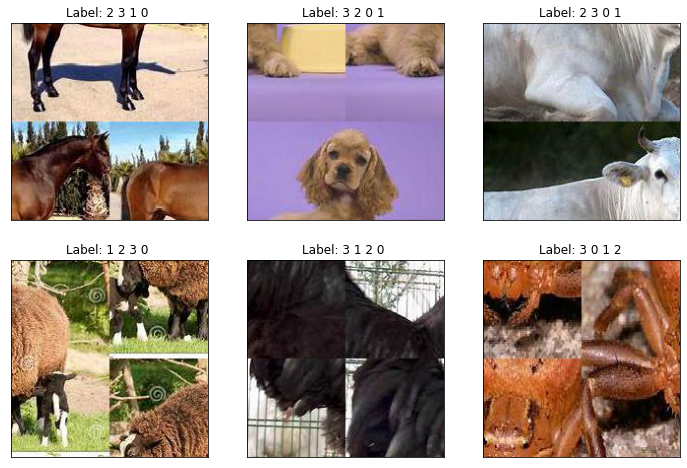

In [6]:
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title("Label: " + df_train['label'][i])
    plt.subplots_adjust(wspace=None, hspace=None)
    
    img_name = df_train['image'][i]
    img = plt.imread(train_path + img_name)
    plt.imshow(img)
plt.show()

### 3. Training

Training

In [7]:
batch_size = 256
lr =0.0007
model = Model2x2(
    [100, 100, 100, 100, 100],
    reg = 2e-5,
    weight_scale=5e-2)
solver = Solver(
    model,
    data,
    print_every = 100,
    num_epochs=50,
    batch_size=batch_size,
    update_rule='adam',
    optim_config={'learning_rate': lr},
    verbose=True)
#solvers[update_rule] = solver
solver.train()
print()

(Iteration 1 / 1950) loss: 3.479697
(Epoch 0 / 50) train acc: 0.033000; val_acc: 0.043500
(Epoch 1 / 50) train acc: 0.077000; val_acc: 0.077500
(Epoch 2 / 50) train acc: 0.127000; val_acc: 0.109000
(Iteration 101 / 1950) loss: 2.944944
(Epoch 3 / 50) train acc: 0.148000; val_acc: 0.131000
(Epoch 4 / 50) train acc: 0.161000; val_acc: 0.147000
(Epoch 5 / 50) train acc: 0.152000; val_acc: 0.160000
(Iteration 201 / 1950) loss: 2.703534
(Epoch 6 / 50) train acc: 0.198000; val_acc: 0.191500
(Epoch 7 / 50) train acc: 0.231000; val_acc: 0.182000
(Iteration 301 / 1950) loss: 2.561097
(Epoch 8 / 50) train acc: 0.219000; val_acc: 0.208000
(Epoch 9 / 50) train acc: 0.253000; val_acc: 0.224000
(Epoch 10 / 50) train acc: 0.282000; val_acc: 0.225000
(Iteration 401 / 1950) loss: 2.223701
(Epoch 11 / 50) train acc: 0.317000; val_acc: 0.242000
(Epoch 12 / 50) train acc: 0.302000; val_acc: 0.239000
(Iteration 501 / 1950) loss: 2.026952
(Epoch 13 / 50) train acc: 0.367000; val_acc: 0.263500
(Epoch 14 / 50

Plot loss history

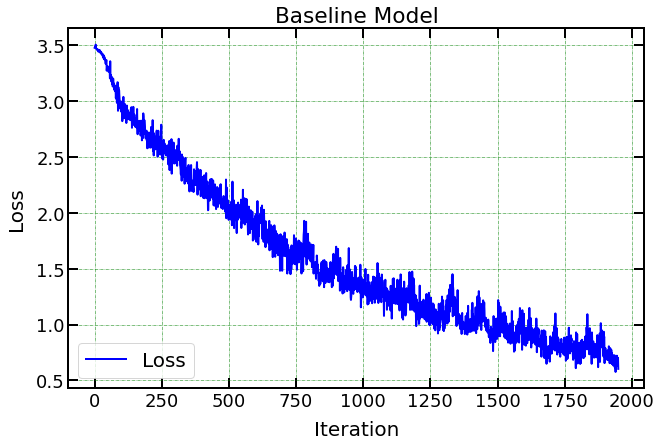

In [13]:
# Rebuild the matplotlib font cache
fm._rebuild()
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans' # font
plt.rcParams['font.size'] = 18         # font size
plt.rcParams['axes.linewidth'] = 2     # axes width

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])    # Add axes object to our figure that takes up entire figure
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.plot(solver.loss_history, linewidth=2, color='b', label="Loss", alpha = 1)
ax.set_ylabel('Loss', labelpad=10, fontsize=20)
ax.set_xlabel('Iteration', labelpad=10, fontsize=20)
ax.grid(color='g', ls = '-.', lw = 0.5)
plt.legend(loc="lower left", fontsize=20)
plt.title("Baseline Model")
plt.savefig('Figure5LLoss.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

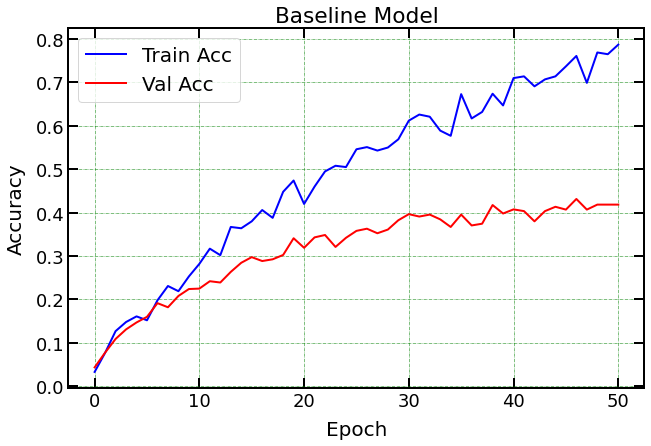

In [14]:
# Rebuild the matplotlib font cache
fm._rebuild()
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans' # font
plt.rcParams['font.size'] = 18         # font size
plt.rcParams['axes.linewidth'] = 2     # axes width

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])    # Add axes object to our figure that takes up entire figure
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.plot(solver.train_acc_history, linewidth=2, color='b', label="Train Acc", alpha = 1)
ax.plot(solver.val_acc_history, linewidth=2, color='r', label="Val Acc", alpha = 1)
ax.set_ylabel('Accuracy', labelpad=10, fontsize=20)
ax.set_xlabel('Epoch', labelpad=10, fontsize=20)
ax.grid(color='g', ls = '-.', lw = 0.5)
plt.legend(loc="upper left", fontsize=20)
plt.title("Baseline Model")
plt.savefig('Figure5LAcc.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

### 4. Evaluation

In [10]:
y_test_pred = np.argmax(model.loss(data_test), axis=1)
y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == label_test).mean())

Validation set accuracy:  0.4315
Test set accuracy:  0.43612132352941174


In [11]:
print(y_test_pred)

[18 23 22 ... 13 17 10]
